### I recently visited a facility that displayed framed "wall art" of funny quotes from famous people.  I found the quotes amusing, so I took pictures of all the wall hangings.  The problem is, I don't want to spend the time typing up all those quotes by hand (of course, I've probably spent much more time programming an alternative).  So, how about an [OCR](https://en.wikipedia.org/wiki/Optical_character_recognition) solution?

### [Windows has a number of OCR solutions available](https://www.nextofwindows.com/5-ocr-ways-to-extract-text-from-images-on-windows-10), but I'd rather work out a command line solution.  Enter [Tesseract-ocr](https://github.com/tesseract-ocr/tesseract).  Tesseract is a command line tool that recognizes text in image files and writes the results to output files.  Like most such tools, it works best in Linux systems.  So, instead of shoe-horning it into my Windows system, I installed it in a Linux sub-system on my Windows workstation.  Then, using the [wsl.exe utility](https://docs.microsoft.com/en-us/windows/wsl/interop), I ran tesseract in this Jupyter Notebook to OCR those images (or at least one of them, anyway).

In [25]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

### Wsl.exe
Check out the wsl tool I'll use to get Jupyter, installed on my Windows laptop, to talk to [tesseract](https://github.com/tesseract-ocr/tesseract), installed in a Linux sub-system on my Windows laptop. 

In [1]:
! wsl --h

/bin/bash: --: invalid option
Usage:	/bin/bash [GNU long option] [option] ...
	/bin/bash [GNU long option] [option] script-file ...
GNU long options:
	--debug
	--debugger
	--dump-po-strings
	--dump-strings
	--help
	--init-file
	--login
	--noediting
	--noprofile
	--norc
	--posix
	--rcfile
	--restricted
	--verbose
	--version
Shell options:
	-ilrsD or -c command or -O shopt_option		(invocation only)
	-abefhkmnptuvxBCHP or -o option


### Step 1: Take a quick gander at the image file containing text I want to OCR:

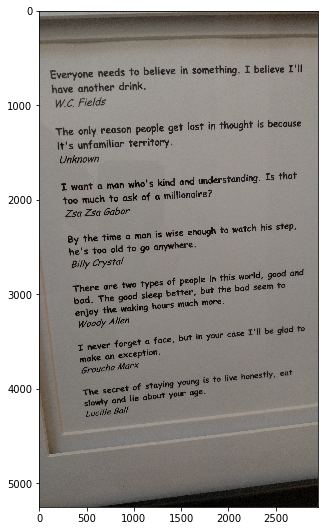

In [30]:
image_file = '/mnt/c/data_files/qsync_laptop/jupyter_notebooks/nb-miscellany/IMG_20180801_150228139.jpg'

img = mpimg.imread(os.path.basename(image_file))
plt.figure(figsize = (5,10))
_ = plt.imshow(img)

### Step 2: Run Tesseract against my image file

In [31]:
! wsl tesseract {image_file} {image_file}

Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Warning. Invalid resolution 0 dpi. Using 70 instead.
Estimating resolution as 818


In [32]:
out_file = image_file + '.txt'

! wsl cat {out_file}

 

 

Everyone needs to believe in something. I believe I'll
have another drink.

W.C. Fields

The only reason people get lost in thought is because
it's unfamiliar territory.

Unknown

I want a man who's kind and understanding. Is that
too much to ask of a millionaire?
Zsa Zsa Gabor

By the time a man is wise enough To watch his step,
he's too old to go anywhere.
Billy Crystal

There are two Types of people in +his world, good and
bad. The good sleep better, but the bad seem To
enjoy the waking hours much more.

Woody Allen

r never forget o face, but in your case I'll be glad to
make an exception.
Groucho Marx

The secret of staying young is to live honestly, eat
slowly and lie about your age.
Lucille Ball

 



### I can even capture the output into a variable to work with:

In [33]:
quotes = ! wsl cat {out_file}
print(quotes)

[' ', '', ' ', '', "Everyone needs to believe in something. I believe I'll", 'have another drink.', '', 'W.C. Fields', '', 'The only reason people get lost in thought is because', "it's unfamiliar territory.", '', 'Unknown', '', "I want a man who's kind and understanding. Is that", 'too much to ask of a millionaire?', 'Zsa Zsa Gabor', '', 'By the time a man is wise enough To watch his step,', "he's too old to go anywhere.", 'Billy Crystal', '', 'There are two Types of people in +his world, good and', 'bad. The good sleep better, but the bad seem To', 'enjoy the waking hours much more.', '', 'Woody Allen', '', "r never forget o face, but in your case I'll be glad to", 'make an exception.', 'Groucho Marx', '', 'The secret of staying young is to live honestly, eat', 'slowly and lie about your age.', 'Lucille Ball', '', ' ', '']
